start: 2020/05/06 17:51:42
平均: -0.000018


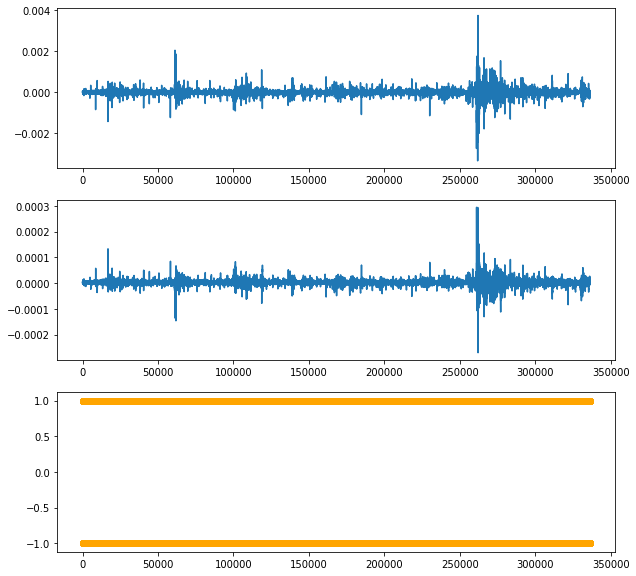

end: 2020/05/06 18:00:09


In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
from mylib import bitcoin
%matplotlib inline

def plot(b):
    x = b.data_test[-3500:]
    y_result = list(b.label_test)[-3500:])
    y_predict = list(b.model.predict(x))
    y_predict_action = [1 if i > 0 else -1 for i in y_predict]

    _, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))
    ax1.plot(list(range(len(x))), y_result)
    ax2.plot(list(range(len(x))), y_predict)
    ax3.scatter(list(range(len(x))), y_predict_action, color="orange")
    plt.show()

def main():
    print("start: " + str(dt.now().strftime("%Y/%m/%d %H:%M:%S")))


    file_name = "train_v6"
    csv = pd.read_csv("datasets/" + file_name + ".csv")
    b = bitcoin.BitcoinRegression()
    b.set_dataset(csv)
    print("平均: %f" % (b.calc_avg_pred()))
    b.set_train_test_dataset(0.8, 0.2)
    b.train()
    plot(b)

    with open("models/" + file_name + ".pickle", mode="wb") as file:
        pickle.dump(b.model, file)
    

    print("end: " + str(dt.now().strftime("%Y/%m/%d %H:%M:%S")))

if __name__ == "__main__":
    main()